-> Chargement des librairies et fonctions

In [3]:
# fonctions utilities (affichage, confusion, etc.)
from Fonction.MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *
from Fonction.AllModels_ALL import *

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


-> Chargement des données brutes

In [4]:
import pandas as pd
Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
data_brute = pd.concat([Init_train,Init_test], ignore_index = True)

print("data_brute avant drop de duplicate : \n", data_brute['our rating'].value_counts(),'\n')
data_brute = data_brute.drop_duplicates()
print("data après drop de duplicate : \n", data_brute['our rating'].value_counts(),'\n')


data_to_test = data_brute[~data_brute['our rating'].isin(['mixture'])]
data_to_test = data_to_test.drop(columns=['public_id', 'ID'])
print("data_to_test avant drop duplicates : \n", data_to_test['our rating'].value_counts(),'\n')
data_to_test = data_to_test.drop_duplicates()
print("datato_test après drop duplicates : \n", data_to_test['our rating'].value_counts(),'\n')

display(data_to_test.describe())

#data_equilibre = balanceSample(data_brute,150,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint1.csv', sep=',', index=False)
#mySample = pd.read_csv('./Data_equilibre/MyData_Sprint1.csv', sep=",")
#print(mySample['our rating'].value_counts())
#X_train = mySample['text']
#y_train = mySample['our rating']

data_brute avant drop de duplicate : 
 false      893
true       421
mixture    414
other      148
Name: our rating, dtype: int64 

data après drop de duplicate : 
 false      815
true       411
mixture    374
other      127
Name: our rating, dtype: int64 

data_to_test avant drop duplicates : 
 false    815
true     411
other    127
Name: our rating, dtype: int64 

datato_test après drop duplicates : 
 false    801
true     407
other    126
Name: our rating, dtype: int64 



,text,title,our rating
count,1334,1324,1334
unique,1323,1220,3
top,ADVERTISEMENT The fire that gutted a flank of ...,Marine Corps. Rebukes Pelosi: “WE DON’T WORK F...,false
freq,2,4,801


Lorsque que nous avons visualiser les différentes données cf le rapport nous nous sommes rendus compte que les données n'était pas du tout bien isolés je décide donc de tester tout les modèles en prenant différent Texte, Titre, Texte+Titre pour ensuite sélectionner le meilleur de classification que je souhaite et le meilleur classifieur.

Je crée donc 3 dataframe correspondant à chaque type de classification 
J'harmonise chacun des jeux de données et j'enregistre le tout dans des variables, ici je test en moyenne en n'harmonistant pas les faux et vrais il y a donc globalement plus de faux en terme de propotion dans true false

Je fais une première harmonisation entre les trues et les falses pour en récupérer le même nombre dans ma concaténation des true et false

In [5]:
from pandas import DataFrame


def initDataToTest(df : DataFrame, columnToDrop : list[str], columnToCount : str, valueToMerge : list[str], size : int, valueOfReplacement : str) :
    data = df.copy()
    data = data.drop(columns=columnToDrop)
    print("data", valueToMerge ,"avant drop duplicates : \n", data[columnToCount].value_counts(),'\n')
    data = data.drop_duplicates()
    print("data", valueToMerge ,"après drop duplicates : \n", data[columnToCount].value_counts(),'\n')
    if size > 0 :
        data = balanceSample(data,size,valueToMerge)
    if valueOfReplacement is not None : 
        data = data.replace(valueToMerge, valueOfReplacement)
    return data

print("dataFrame text only :")
df_text = pd.concat([initDataToTest(data_to_test[data_to_test['our rating'] == 'other'],['title'], ['our rating'], ['other'], 0, None),
                             initDataToTest(data_to_test,['title'], ['our rating'], ['true', 'false'], 75,'true/false')])
df_text = balanceSample(df_text, 150, ['true/false', 'other'])
X_train_text  = df_text['text']
Y_train_text = df_text['our rating']


print("dataFrame title only :")
df_title = pd.concat([initDataToTest(data_to_test[data_to_test['our rating'] == 'other'],['text'], ['our rating'], ['other'], 0, None),
                             initDataToTest(data_to_test,['text'], ['our rating'], ['true', 'false'], 75,'true/false')])
df_title = balanceSample(df_title, 150, ['true/false', 'other'])
X_train_title = df_title['title']
Y_train_title = df_title['our rating']


print("dataFrame text_title concatenate only :")
df_text_titre_concat = data_to_test.copy()
df_text_titre_concat = df_text_titre_concat.fillna('')
df_text_titre_concat['title_text'] = df_text_titre_concat['title'].str.cat(df_text_titre_concat['text'], sep=' ')
df_text_and_title = pd.concat([initDataToTest(df_text_titre_concat[df_text_titre_concat['our rating'] == 'other'],['text', 'title'], ['our rating'], ['other'], 0, None),
                             initDataToTest(df_text_titre_concat,['text', 'title'], ['our rating'], ['true', 'false'], 75,'true/false')])
df_text_and_title = balanceSample(df_text_and_title, 150, ['true/false', 'other'])
X_train_text_and_title = df_text_and_title['title_text']
Y_train_text_and_title = df_text_and_title['our rating']


dataFrame text only :
data ['other'] avant drop duplicates : 
 our rating
other         126
dtype: int64 

data ['other'] après drop duplicates : 
 our rating
other         126
dtype: int64 

data ['true', 'false'] avant drop duplicates : 
 our rating
false         801
true          407
other         126
dtype: int64 

data ['true', 'false'] après drop duplicates : 
 our rating
false         800
true          400
other         126
dtype: int64 

dataFrame title only :
data ['other'] avant drop duplicates : 
 our rating
other         126
dtype: int64 

data ['other'] après drop duplicates : 
 our rating
other         125
dtype: int64 

data ['true', 'false'] avant drop duplicates : 
 our rating
false         801
true          407
other         126
dtype: int64 

data ['true', 'false'] après drop duplicates : 
 our rating
false         702
true          400
other         125
dtype: int64 

dataFrame text_title concatenate only :
data ['other'] avant drop duplicates : 
 our rating
other  

In [2]:
df_text.to_csv("./DataFrame/df_text.csv")
df_title.to_csv("./DataFrame/df_title.csv")
df_text_and_title.to_csv("./DataFrame/df_text_and_title.csv")

NameError: name 'df_text' is not defined

Chargement Dataframe

In [4]:
df_text = pd.read_csv("./DataFrame/df_text.csv")
X_train_text  = df_text['text']
Y_train_text = df_text['our rating']
df_title = pd.read_csv("./DataFrame/df_title.csv")
X_train_title = df_title['title']
Y_train_title = df_title['our rating']
df_text_and_title = pd.read_csv("./DataFrame/df_text_and_title.csv")
X_train_text_and_title = df_text_and_title['title_text']
Y_train_text_and_title = df_text_and_title['our rating']

-> Je test tout les models

Fonction Text


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\33683\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.660 (0.095) in 0.503 s
Evaluation de  LR
LR : 0.677 (0.083) in 2.635 s
Evaluation de  KNN
KNN : 0.557 (0.109) in 0.986 s
Evaluation de  CART
CART : 0.580 (0.075) in 6.527 s
Evaluation de  RF
RF : 0.650 (0.089) in 9.535 s
Evaluation de  SVM
SVM : 0.690 (0.045) in 278.235 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.690  (0.045)  en 278.235   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.690  (0.045)  en 278.235   s
Classifier :  LR  accuracy : 0.677  (0.083)  en 2.635   s
Classifier :  MultinomialNB  accuracy : 0.660  (0.095)  en 0.503   s
Classifier :  RF  accuracy : 0.650  (0.089)  en 9.535   s
Classifier :  CART  accuracy : 0.580  (0.075)  en 6.527   s
Classifier :  KNN  accuracy : 0.557  (0.109)  en 0.986   s
Fonction Titre


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\33683\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.587 (0.107) in 0.159 s
Evaluation de  LR
LR : 0.617 (0.101) in 0.441 s
Evaluation de  KNN
KNN : 0.560 (0.071) in 0.290 s
Evaluation de  CART
CART : 0.627 (0.077) in 1.278 s
Evaluation de  RF
RF : 0.663 (0.050) in 6.051 s
Evaluation de  SVM
SVM : 0.667 (0.045) in 1.647 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.667  (0.045)  en 1.647   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.667  (0.045)  en 1.647   s
Classifier :  RF  accuracy : 0.663  (0.050)  en 6.051   s
Classifier :  CART  accuracy : 0.627  (0.077)  en 1.278   s
Classifier :  LR  accuracy : 0.617  (0.101)  en 0.441   s
Classifier :  MultinomialNB  accuracy : 0.587  (0.107)  en 0.159   s
Classifier :  KNN  accuracy : 0.560  (0.071)  en 0.290   s
Fonction titre et text 


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\33683\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Evaluation de  MultinomialNB
MultinomialNB : 0.627 (0.090) in 0.486 s
Evaluation de  LR
LR : 0.623 (0.099) in 2.566 s
Evaluation de  KNN
KNN : 0.610 (0.084) in 0.881 s
Evaluation de  CART
CART : 0.570 (0.053) in 7.925 s
Evaluation de  RF
RF : 0.647 (0.058) in 9.742 s
Evaluation de  SVM
SVM : 0.640 (0.080) in 277.343 s

Le meilleur resultat : 
Classifier :  RF  accuracy : 0.647  (0.058)  en 9.742   s

Tous les résultats : 

Classifier :  RF  accuracy : 0.647  (0.058)  en 9.742   s
Classifier :  SVM  accuracy : 0.640  (0.080)  en 277.343   s
Classifier :  MultinomialNB  accuracy : 0.627  (0.090)  en 0.486   s
Classifier :  LR  accuracy : 0.623  (0.099)  en 2.566   s
Classifier :  KNN  accuracy : 0.610  (0.084)  en 0.881   s
Classifier :  CART  accuracy : 0.570  (0.053)  en 7.925   s


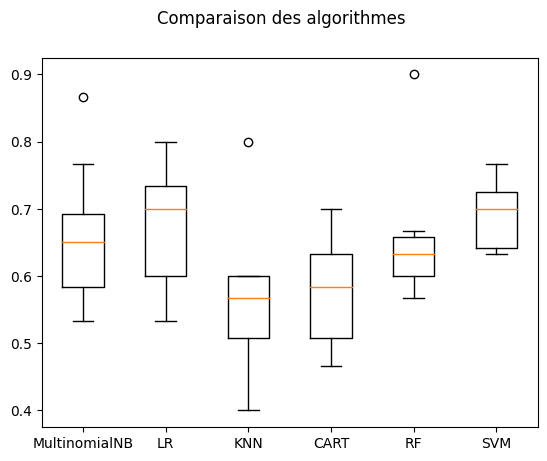

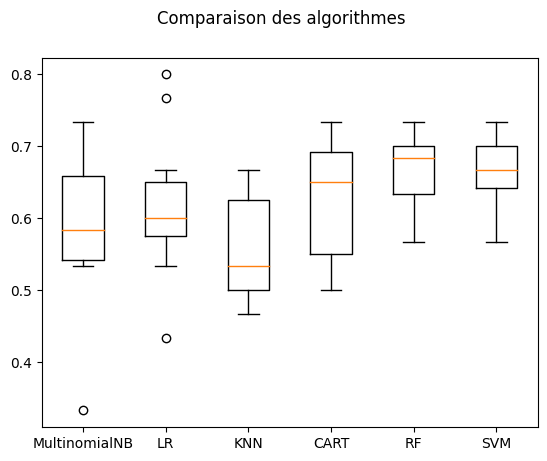

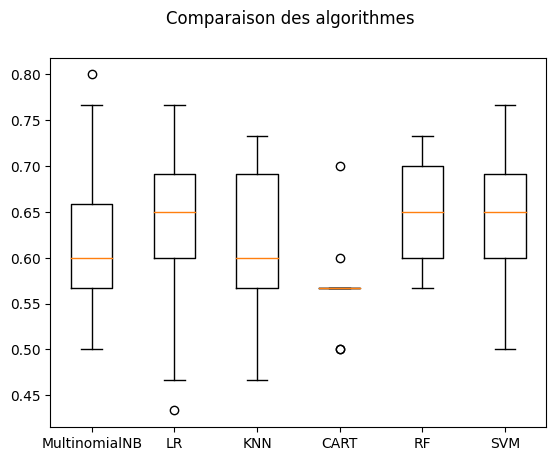

In [8]:
print("Fonction Text")

testAllModel(X_train_text,Y_train_text,5)

print("Fonction Titre")

testAllModel(X_train_title,Y_train_title,5)

print("Fonction titre et text ")

testAllModel(X_train_text_and_title, Y_train_text_and_title,5)


-> je test les hyper-parametres de SVC

Pour le Texte

In [12]:
print("Test SVC Text")
testSVC(X_train_text,Y_train_text, 5)

Test SVC Text
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 2560 candidates, totalling 12800 fits
réalisé en  6501.005 s
Meilleur résultat : 0.703
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__getstemmer: False
	cleaner__removedigit: True
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
951                       True                False                  True   
620                       True                 True          

Pour le Titre


In [13]:
print("Test SVC Titre")
testSVC(X_train_title,Y_train_title, 5)

Test SVC Titre
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 2560 candidates, totalling 12800 fits
réalisé en  222.986 s
Meilleur résultat : 0.660
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__getstemmer: False
	cleaner__removedigit: False
	svm__C: 0.001
	svm__gamma: 0.001
	svm__kernel: 'poly'
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
2296                      False                False                 False   
2360                      False               

In [4]:
print("Test SVC Text and Titre")
testSVC(X_train_text_and_title,Y_train_text_and_title, 5)

Test SVC Text and Titre
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [0.001, 0.01, 0.1, 1, 10], 'svm__gamma': [0.001, 0.01, 0.1, 1], 'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
Fitting 5 folds for each of 2560 candidates, totalling 12800 fits
réalisé en  6559.843 s
Meilleur résultat : 0.673
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__getstemmer: False
	cleaner__removedigit: False
	svm__C: 1
	svm__gamma: 0.001
	svm__kernel: 'linear'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
       cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
1201                       True                False                 False   
1153                       True            

Pour le Texte et le Titre

-> Ajuster pretraitement

-> enregistrement du modele SVC

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint1/SentimentModel_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Second Modèle

In [5]:
print("Test RFC Text")
testRFC(X_train_text,Y_train_text,5)

Test RFC Text
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 768 candidates, totalling 3840 fits
réalisé en  3044.708 s
Meilleur résultat : 0.720
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__getstemmer: True
	cleaner__removedigit: False
	rfc__max_depth: 30
	rfc__min_samples_leaf: 2
	rfc__min_samples_split: 10
	rfc__n_estimators: 1200
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
181                       True                 True                 False   
141  

In [18]:
print("Test RFC Title")
testRFC(X_train_title,Y_train_title,5)

Test RFC Title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 768 candidates, totalling 3840 fits
réalisé en  1281.896 s
Meilleur résultat : 0.663
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__getstemmer: True
	cleaner__removedigit: False
	rfc__max_depth: 30
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 5
	rfc__n_estimators: 1200
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
534                      False                 True                 False  

In [6]:
print("Test RFC Text and title")
testRFC(X_train_text_and_title,Y_train_text_and_title,5)

Test RFC Text and title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 768 candidates, totalling 3840 fits
réalisé en  3288.387 s
Meilleur résultat : 0.663
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__getstemmer: True
	cleaner__removedigit: False
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 10
	rfc__n_estimators: 500
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
490                      False                 True               

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=1, min_samples_split=10, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint1/RandomForestClassifier_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Le dernier modele

In [8]:
print("Test LR text")
testLR(X_train_text,Y_train_text,5)

Test LR text
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
réalisé en  941.495 s
Meilleur résultat : 0.710
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__getstemmer: True
	cleaner__removedigit: False
	lr__C: 1.0
	lr__penalty: 'l2'
	lr__solver: 'liblinear'
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
94                       True                 True                 False   
92                       True                 True                 False

azea

In [17]:
print("Test LR Titre")
testLR(X_train_title,Y_train_title,5)

Test LR Titre
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
réalisé en  93.201 s
Meilleur résultat : 0.653
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__getstemmer: True
	cleaner__removedigit: True
	lr__C: 1.0
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
26                       True                 True                  True   
28                       True                 True                  True 

aze

In [9]:
print("Test LR Texte et Titre")
testLR(X_train_text_and_title, Y_train_text_and_title,5)

Test LR Texte et Titre
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 480 candidates, totalling 2400 fits
réalisé en  1079.282 s
Meilleur résultat : 0.663
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__getstemmer: True
	cleaner__removedigit: False
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'newton-cg'
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      cleaner__getlemmatisation  cleaner__getstemmer  cleaner__removedigit  \
305                      False                 True                 False   
301                      False                 True            

In [ ]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('lr', LogisticRegression(C=10,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Modele/Sprint1/LogisticRegression_Sprint1.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

Afin d'améliorer nos jeux de données nous avons traduit grâce à l'API deepl l'ensemble des textes du jeux de données allemands nous les concaténons aux jeux de données précédents afin de l'améliorer ! Nous allons donc retester l'ensemble des modèles. 

In [7]:
print("Test CART, Texte")
testCART(X_train_text, Y_train_text,5)

Test CART, Texte
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'CART']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'CART__max_depth': [10, 20, 30], 'CART__min_samples_split': [2, 5, 10], 'CART__min_samples_leaf': [1, 2, 4], 'CART__criterion': ['gini', 'entropy']}
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
réalisé en  3389.543 s
Meilleur résultat : 0.677
Ensemble des meilleurs paramètres :
	CART__criterion: 'entropy'
	CART__max_depth: 10
	CART__min_samples_leaf: 1
	CART__min_samples_split: 5
	cleaner__getlemmatisation: False
	cleaner__getstemmer: True
	cleaner__removedigit: True
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      CART__criterion  CART__max_depth  CART__min_samples_leaf  \
913          entropy               10                       1   
702 

In [5]:
print("Test CART, Title")
testCART(X_train_title, Y_train_title,5)

Test CART, Title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'CART']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'CART__max_depth': [10, 20, 30], 'CART__min_samples_split': [2, 5, 10], 'CART__min_samples_leaf': [1, 2, 4], 'CART__criterion': ['gini', 'entropy']}
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
réalisé en  283.017 s
Meilleur résultat : 0.657
Ensemble des meilleurs paramètres :
	CART__criterion: 'gini'
	CART__max_depth: 30
	CART__min_samples_leaf: 2
	CART__min_samples_split: 2
	cleaner__getlemmatisation: False
	cleaner__getstemmer: True
	cleaner__removedigit: True
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
     CART__criterion  CART__max_depth  CART__min_samples_leaf  \
688            gini               30                       2   
754  

In [7]:
print("Test CART, Text and title")
testCART(X_train_text_and_title, Y_train_text_and_title,5)

Test CART, Text and title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'CART']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'CART__max_depth': [10, 20, 30], 'CART__min_samples_split': [2, 5, 10], 'CART__min_samples_leaf': [1, 2, 4], 'CART__criterion': ['gini', 'entropy']}
Fitting 5 folds for each of 1728 candidates, totalling 8640 fits
réalisé en  4087.149 s
Meilleur résultat : 0.650
Ensemble des meilleurs paramètres :
	CART__criterion: 'gini'
	CART__max_depth: 20
	CART__min_samples_leaf: 1
	CART__min_samples_split: 2
	cleaner__getlemmatisation: True
	cleaner__getstemmer: True
	cleaner__removedigit: True
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
     CART__criterion  CART__max_depth  CART__min_samples_leaf  \
288            gini               20                       1

In [12]:
print("Test KNN text")
testKNeighborsClassifier(X_train_text, Y_train_text,5)

Test KNN text
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'KNN']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['minkowski', 'euclidean', 'manhattan']}
Fitting 5 folds for each of 10752 candidates, totalling 53760 fits
réalisé en  25578.512 s
Meilleur résultat : 0.707
Ensemble des meilleurs paramètres :
	KNN__algorithm: 'auto'
	KNN__metric: 'minkowski'
	KNN__n_neighbors: 14
	KNN__weights: 'distance'
	cleaner__getlemmatisation: True
	cleaner__getstemmer: True
	cleaner__removedigit: False
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
      KNN__algorithm KNN__metric  KNN__n_neighbors KNN__wei

In [6]:
print("Test KNN title")
testKNeighborsClassifier(X_train_title, Y_train_title,5)

Test KNN title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'KNN']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['minkowski', 'euclidean', 'manhattan']}
Fitting 5 folds for each of 10752 candidates, totalling 53760 fits
réalisé en  1517.085 s
Meilleur résultat : 0.683
Ensemble des meilleurs paramètres :
	KNN__algorithm: 'auto'
	KNN__metric: 'minkowski'
	KNN__n_neighbors: 11
	KNN__weights: 'distance'
	cleaner__getlemmatisation: False
	cleaner__getstemmer: False
	cleaner__removedigit: False
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
      KNN__algorithm KNN__metric  KNN__n_neighbors KNN__w

In [8]:
print("Test KNN text and title")
testKNeighborsClassifier(X_train_text_and_title, Y_train_text_and_title,5)

Test KNN text and title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'KNN']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'KNN__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'KNN__weights': ['uniform', 'distance'], 'KNN__metric': ['minkowski', 'euclidean', 'manhattan']}
Fitting 5 folds for each of 10752 candidates, totalling 53760 fits
réalisé en  22120.986 s
Meilleur résultat : 0.673
Ensemble des meilleurs paramètres :
	KNN__algorithm: 'auto'
	KNN__metric: 'minkowski'
	KNN__n_neighbors: 9
	KNN__weights: 'distance'
	cleaner__getlemmatisation: False
	cleaner__getstemmer: True
	cleaner__removedigit: False
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      KNN__algorithm KNN__metric  KNN__n_neighbors KNN

In [5]:
print("MultinomialNB test Text")
testMultinomialNB(X_train_text, Y_train_text,5)

MultinomialNB test Text
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'MultinomialNB']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'MultinomialNB__alpha': [0.1, 0.5, 1.0, 2.0], 'MultinomialNB__fit_prior': [True, False], 'MultinomialNB__force_alpha': [True, False]}
Fitting 5 folds for each of 512 candidates, totalling 2560 fits
réalisé en  1010.455 s
Meilleur résultat : 0.707
Ensemble des meilleurs paramètres :
	MultinomialNB__alpha: 1.0
	MultinomialNB__fit_prior: True
	MultinomialNB__force_alpha: True
	cleaner__getlemmatisation: True
	cleaner__getstemmer: False
	cleaner__removedigit: False
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
      MultinomialNB__alpha  MultinomialNB__fit_prior  \
334                   1.0                     False   
302                   1.0   

In [8]:
print("MultinomialNB test Title")
testMultinomialNB(X_train_title, Y_train_title,5)

MultinomialNB test Title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'MultinomialNB']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'MultinomialNB__alpha': [0.1, 0.5, 1.0, 2.0], 'MultinomialNB__fit_prior': [True, False], 'MultinomialNB__force_alpha': [True, False]}
Fitting 5 folds for each of 512 candidates, totalling 2560 fits
réalisé en  73.155 s
Meilleur résultat : 0.657
Ensemble des meilleurs paramètres :
	MultinomialNB__alpha: 0.1
	MultinomialNB__fit_prior: True
	MultinomialNB__force_alpha: True
	cleaner__getlemmatisation: False
	cleaner__getstemmer: True
	cleaner__removedigit: False
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
      MultinomialNB__alpha  MultinomialNB__fit_prior  \
20                    0.1                      True   
54                    0.1     

In [6]:
print("MultinomialNB test Text and Title")
testMultinomialNB(X_train_text_and_title, Y_train_text_and_title,5)

MultinomialNB test Text and Title
Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'MultinomialNB']
parameters :
{'cleaner__getstemmer': [True, False], 'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'MultinomialNB__alpha': [0.1, 0.5, 1.0, 2.0], 'MultinomialNB__fit_prior': [True, False], 'MultinomialNB__force_alpha': [True, False]}
Fitting 5 folds for each of 512 candidates, totalling 2560 fits
réalisé en  987.406 s
Meilleur résultat : 0.677
Ensemble des meilleurs paramètres :
	MultinomialNB__alpha: 1.0
	MultinomialNB__fit_prior: True
	MultinomialNB__force_alpha: True
	cleaner__getlemmatisation: True
	cleaner__getstemmer: True
	cleaner__removedigit: False
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
      MultinomialNB__alpha  MultinomialNB__fit_prior  \
277                   1.0                      True   
295                   1.0 